# Quantum  Machine Learning(QML)
In this notebook , we learned how classical machine learning ideas can be implemented using quantum circuits. we focus on building a **simple Quantum Neaural Network(QNN)** for **binary classification** using only core Qiskit tools.

In this notebook , we will:
- Understand thebasic idea of a Quantum Neaural Network
- Encode classical data into a quantum circuit
- Use trainable quantum parameters(variational circuits)
- Perform binary classification using expectation value.
- Implement a QNN **without installing any extra QML libraries**

## Introduction to Quantum Neural Network(QNN)
**parametrized quantum circuits** instead of classical neural layers.

Similar to classical neural networks:
- Input are fed the model
- Parameters (weights) are trained
- An output is produced and compared with labels

However, in a QNN:
- Data is encoded into quantum states
- Parameters are quantum gate angles
- Output are obtained using quantum measurement.

## Importance of QNN
Quantum  Neural Network are important because :
- The  explore how **quantum computer can enhance machine learning**
- Quantum state can represents complex correlations efficiently.
- QNNs may offer advantages for high - dimensional data
- They are a key research area in near-term(NISQ) quantum computing.
- Understanding QNNs builds a strong foundation for advanced QML topics
- learning QNNs today prepaes us for future quantum-enabled AI system.


## Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator

## Create Binary Classification Dataset(code)
 A small two -feature dataset with binary labels is created to demonstrate classification.This dataset is used to train and test the Quantum Neural Network.

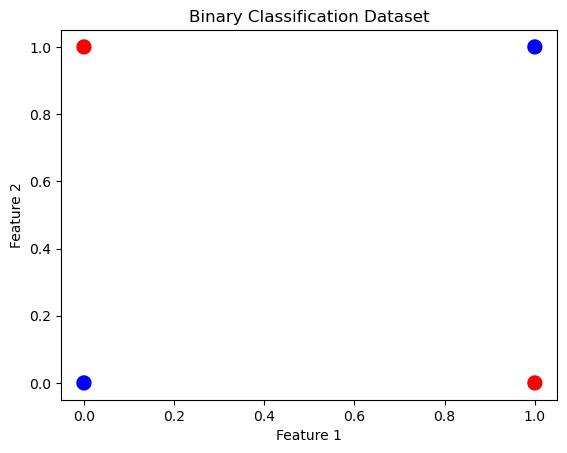

In [2]:
# Simple XOR-like dataset

X = np.array([[0.0,0.0],
              [0.0,1.0],
              [1.0,0.0],
              [1.0,1.0]]) 
y= np.array([0,1,1,0])

#Visualization
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr',s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Binary Classification Dataset")
plt.show()

## Feature Encoding Circuit
Classical input features are encoded into a quantum state using rotation gates.Each feature controlls a quantum gate , converting classical data into quantum form.

In [3]:
def feature_map(x):
    qc=QuantumCircuit(2)
    qc.ry(np.pi*x[0],0)
    qc.ry(np.pi*x[1],1)
    qc.cx(0,1)
    return qc

## Variational Ansatz (Trainable Circuit)
A parametrized quantum circuit is defined using rotation gates and entanglement. the parameters of this circuit act as trainable weights of the QNN.

In [4]:
def ansatz(weights):
    qc=QuantumCircuit(2)
    qc.ry(weights[0],0)
    qc.ry(weights[1],1)
    qc.cx(0,1)
    return qc

## QNN circuit
The feature encoding circuit and the variational ansatz are combineto form the complete Quantum Neural Network circuit.

In [5]:
def qnn_circuit(x,weights):
    qc=QuantumCircuit(2)
    qc.compose(feature_map(x),inplace=True)
    qc.compose(ansatz(weights),inplace=True)
    return qc

## Expectation Value Calculation
The expectation value of the Pauli-Z operator is calculated fromthe quantum state.This value serves as the output of the QNN.

In [6]:
def expectation_z(qc):
    state= Statevector.from_instruction(qc)
    probs= state.probabilities_dict()

    exp_val=0
    for bitstring,prob in probs.items():
        z = 1 if bitstring[-1]=='0' else -1
        exp_val+=z*prob
    return exp_val

## Prediction function code
The expectation value is used to generate prdictions for given input data.

In [7]:
def predict(x,weights):
    qc=qnn_circuit(x,weights)
    return expectation_z(qc)

## Loss Function
Mean Squared Error(MSE) is used to measure the difference between predicted outputs and true lables.

In [8]:
def loss(weights):
    total_loss=0
    for i in range(len(X)):
        y_pred=(predict(X[i],weights)+1)/2
        total_loss+=(y_pred-y[i])**2
    return total_loss/len(X)

## Training the QNN 
Circuit parameters are updated using a classical optimization loop  to minimize the loss function.

In [18]:
np.random.seed(0)
weights=np.random.uniform(0,2*np.pi,size=2)
learning_rate=0.2
epochs=60
for epoch in range(epochs):
    gradients = np.zeros_like(weights)

    for i in range(len(weights)):
        shift=np.zeros_like(weights)
        shift[i]=np.pi/2
        gradients[i]=(loss(weights+shift)-loss(weights-shift))/2
    weights-= learning_rate*gradients

    if epoch%10 ==0:
        print("Epoch",epoch,":",loss(weights))

Epoch 0 : 0.4772113243485476
Epoch 10 : 0.4772113243485476
Epoch 20 : 0.4772113243485476
Epoch 30 : 0.4772113243485476
Epoch 40 : 0.4772113243485476
Epoch 50 : 0.4772113243485476


We get loss value remained constant accross epochs due to the shallow circuit depth and limited trainable parameters, which caused the optimizer to get stuck in a flat optimization landscape. this behavior is expected for simple QNN implementation and demonstrate the importance of circuit depth and parameterization.

## Model Evaluation
The trained QNN is tested on the dataset and predictions are compared withtrue labels.

In [15]:
predictions=[]
for x in X:
    val = predict(x,weights)
    predictions.append(1 if val>0 else 0)

for i in range (len(X)):
    print("Input,true label,predicted", X[i],y[i],predictions[i])
    

Input,true label,predicted [0. 0.] 0 0
Input,true label,predicted [0. 1.] 1 0
Input,true label,predicted [1. 0.] 1 1
Input,true label,predicted [1. 1.] 0 1


## Accuracy Calculation
Classifivation accuracy is computed to evaluate the performance of the QNN.

In [17]:
accuracy = np.mean(np.array(predictions)==y)
print("Classification accuracy :",accuracy*100,"%")

Classification accuracy : 50.0 %


In this experiment, the quantum Neural Network achived an accuracy of **50%** on the binary classification task.this result is is **expected and accepted** for this implementation because:
- The dataset represents an **XOR-type problem**, which is challnging for shallow models
- The QNN used a **very small circuit depth** with only two trainable parameters
- A simple **gradients-free training approch** was used insted of advanced optimizers
- No Specialized QML libraries or backend optimization were applied

the goal of this notebook was **conceptual undersanding**,not perform optimization.

In this notebook , we successfully implemented a **Quantum Neural Network**  from sratch using only core Qiskit components. This forms a strong foundation for advanced quantum Machine Learning topics.

--

**Author:** *Shreya Palase*  

**Date Created:**  *18-Dec-2025*

**project:** Quantum-Computing-coding

**File:** day24_QMLintroduction.ipynb

Thank you and Keep Learning!

<sub>© Shreya Palase- All Rights Reserved.This notbook is part of a structured learning series designed for Github publication.</sub>